In [2]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from torch import nn
sns.set_style("dark")

In [3]:
## Data Preparation
data= np.random.multivariate_normal([3,4],[[1,0.7],[0.7,1]],size=200)
x = data[:,0]
y = data[:,1]

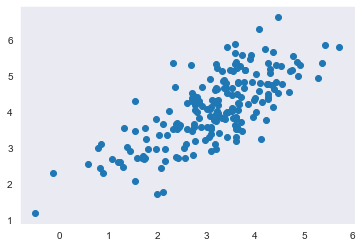

In [4]:
plt.scatter(data[:,0],data[:,1])

In [5]:
m = nn.Parameter(data=torch.randn(1))
b = nn.Parameter(data=torch.randn(1))

In [6]:
x = torch.tensor(x)
y = torch.tensor(y)

In [7]:
def mse(yt,yp):
    return ((yt-yp)**2).mean()

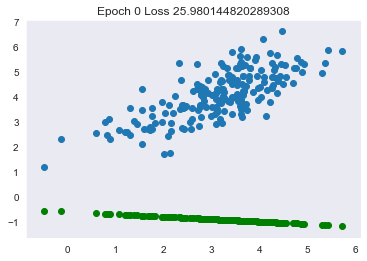

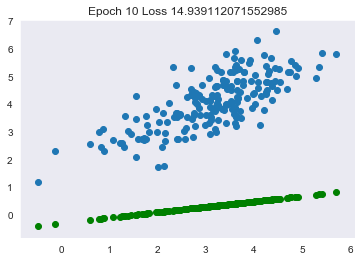

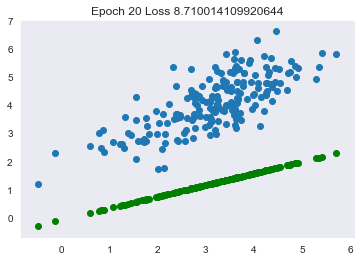

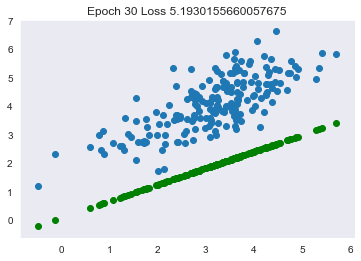

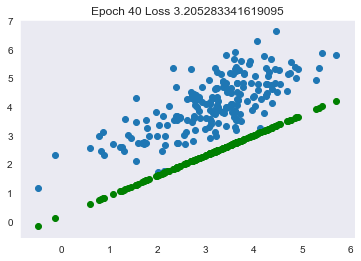

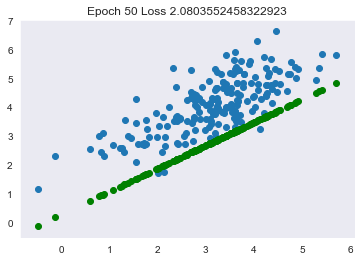

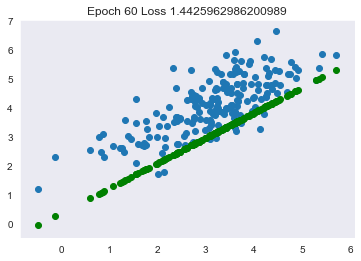

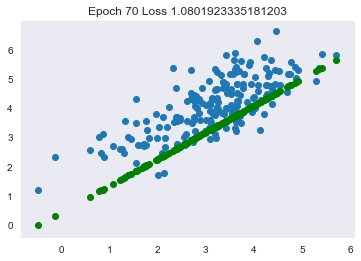

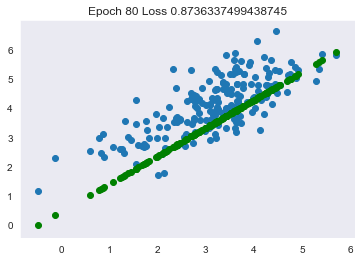

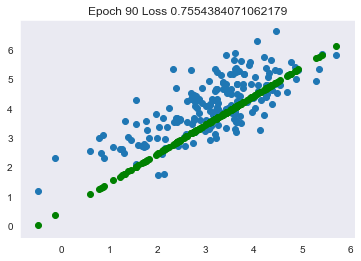

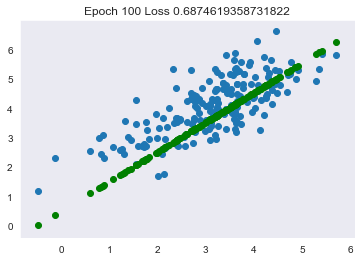

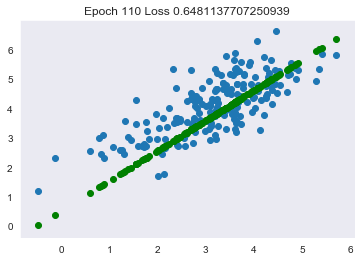

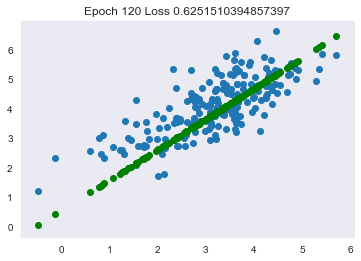

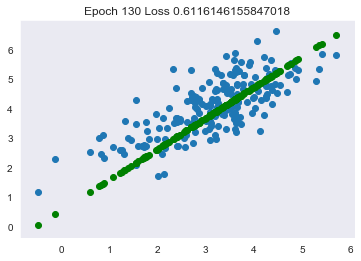

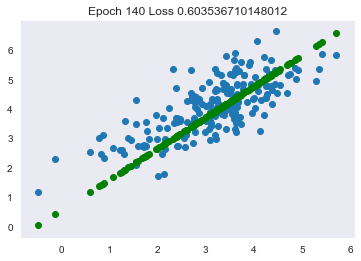

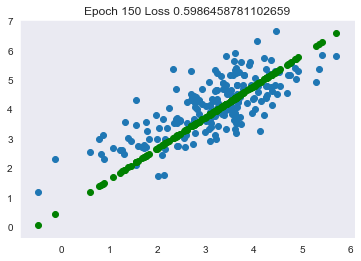

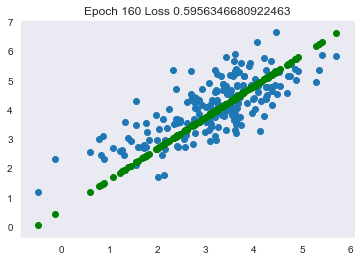

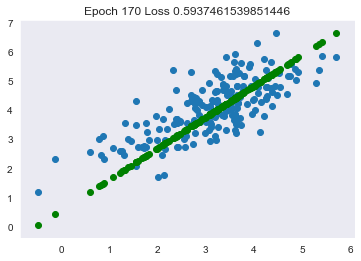

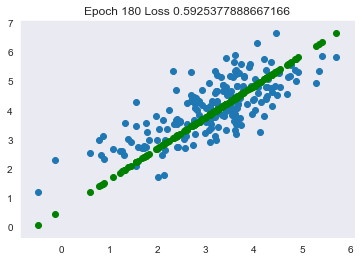

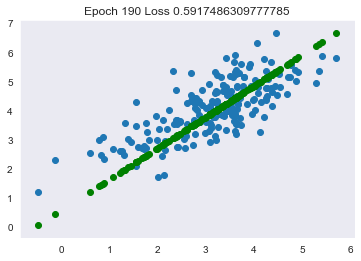

In [8]:
for i in range(200):
    o = m*x+b
    loss = mse(y,o)
    if i%10 == 0:
        plt.figure()
        plt.scatter(data[:,0],data[:,1])
        plt.scatter(x.numpy(),o.detach().numpy(),color='green')
        plt.title(f'Epoch {i} Loss {loss.item()}')
        plt.show()
    loss.backward()
    lr = 1e-3

    with torch.no_grad():
        m -= lr*m.grad
        b -= lr*m.grad
        m.grad.zero_()
        b.grad.zero_()